In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-collision-dataset/vehicle_data.csv
/kaggle/input/road-traffic-collision-dataset/accident_data.csv


In [2]:
accidentdf = pd.read_csv("../input/road-traffic-collision-dataset/accident_data.csv",parse_dates=['Date'])

In [3]:
accidentdf.sample(6)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
410165,200701ZD30484,A,215.0,NaN,0.0,Slight,None,2007-07-10,Sunday,2.0,Data missing or out of range,Not at junction or within 20 metres,51.406562,Darkness - lighting unknown,Croydon,Croydon,533300.0,169250.0,-0.084863,E01001150,1,2,0.0,4.0,Metropolitan Police,Dry,Single carriageway,None,30,02:05,Urban,Fine no high winds,2007,No
730595,2.00893E+12,A,85.0,Unclassified,0.0,Slight,None,2008-01-01,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,56.375788,Darkness - lights lit,Perth and Kinross,Perth and Kinross,277530.0,722150.0,-3.984676,NaN,1,1,0.0,0.0,Tayside,Wet or damp,Single carriageway,None,30,01:30,Rural,Raining no high winds,2008,Yes
850649,200943P310049,A,4165.0,Unclassified,0.0,Slight,None,2009-04-24,Friday,1.0,Auto traffic signal,T or staggered junction,51.761380,Daylight,Oxford,Oxfordshire,451140.0,207230.0,-1.260420,E01028566,1,1,0.0,4.0,Thames Valley,Dry,Single carriageway,None,30,19:25,Urban,Fine no high winds,2009,No
209914,200601MM71002,A,2215.0,NaN,0.0,Slight,None,2006-09-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.468693,Darkness - lights lit,Southwark,Southwark,534300.0,176190.0,-0.067864,E01004062,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:57,Urban,Other,2006,No
222268,200601ZD30157,C,0.0,Unclassified,0.0,Slight,None,2006-08-01,Sunday,1.0,Give way or uncontrolled,T or staggered junction,51.407864,Darkness - lights lit,Croydon,Croydon,531180.0,169340.0,-0.115293,E01001087,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,16:35,Urban,Raining no high winds,2006,No
686321,200843S118028,NaN,1098.0,NaN,0.0,Slight,None,2008-02-23,Saturday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.043346,Daylight,Milton Keynes,Milton Keynes,485280.0,239060.0,-0.757978,E01016730,1,1,0.0,0.0,Thames Valley,Dry,Single carriageway,None,30,13:15,Urban,Fine no high winds,2008,No


In [4]:
!pip install missingno

In [5]:
import missingno as mno
# extract a list of null columns
null_columns = pd.DataFrame(accidentdf[accidentdf.columns[accidentdf.isnull().any()]].isnull().sum()*100/ accidentdf.shape[0], columns =["Percentage of null values"])
null_columns["Total Nan Values"]=accidentdf[accidentdf.columns[accidentdf.isnull().any()]].isnull().sum()
null_columns

,Percentage of null values,Total Nan Values
1st_Road_Class,29.143266,305589
1st_Road_Number,0.000191,2
2nd_Road_Class,41.944925,439824
2nd_Road_Number,1.030255,10803
Carriageway_Hazards,0.002766,29
Did_Police_Officer_Attend_Scene_of_Accident,0.025654,269
Latitude,0.010586,111
Light_Conditions,0.198746,2084
Location_Easting_OSGR,0.010586,111
Location_Northing_OSGR,0.010586,111


First road class, second road class, lsoa of accident have a lot of missing values.The rest have less than 5% missing values

In [6]:
# make a list of colums that have null values
null_cols = null_columns.index.tolist()
print(type(null_cols))
print(null_cols)

<class 'list'>
['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Light_Conditions', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']


<AxesSubplot:>

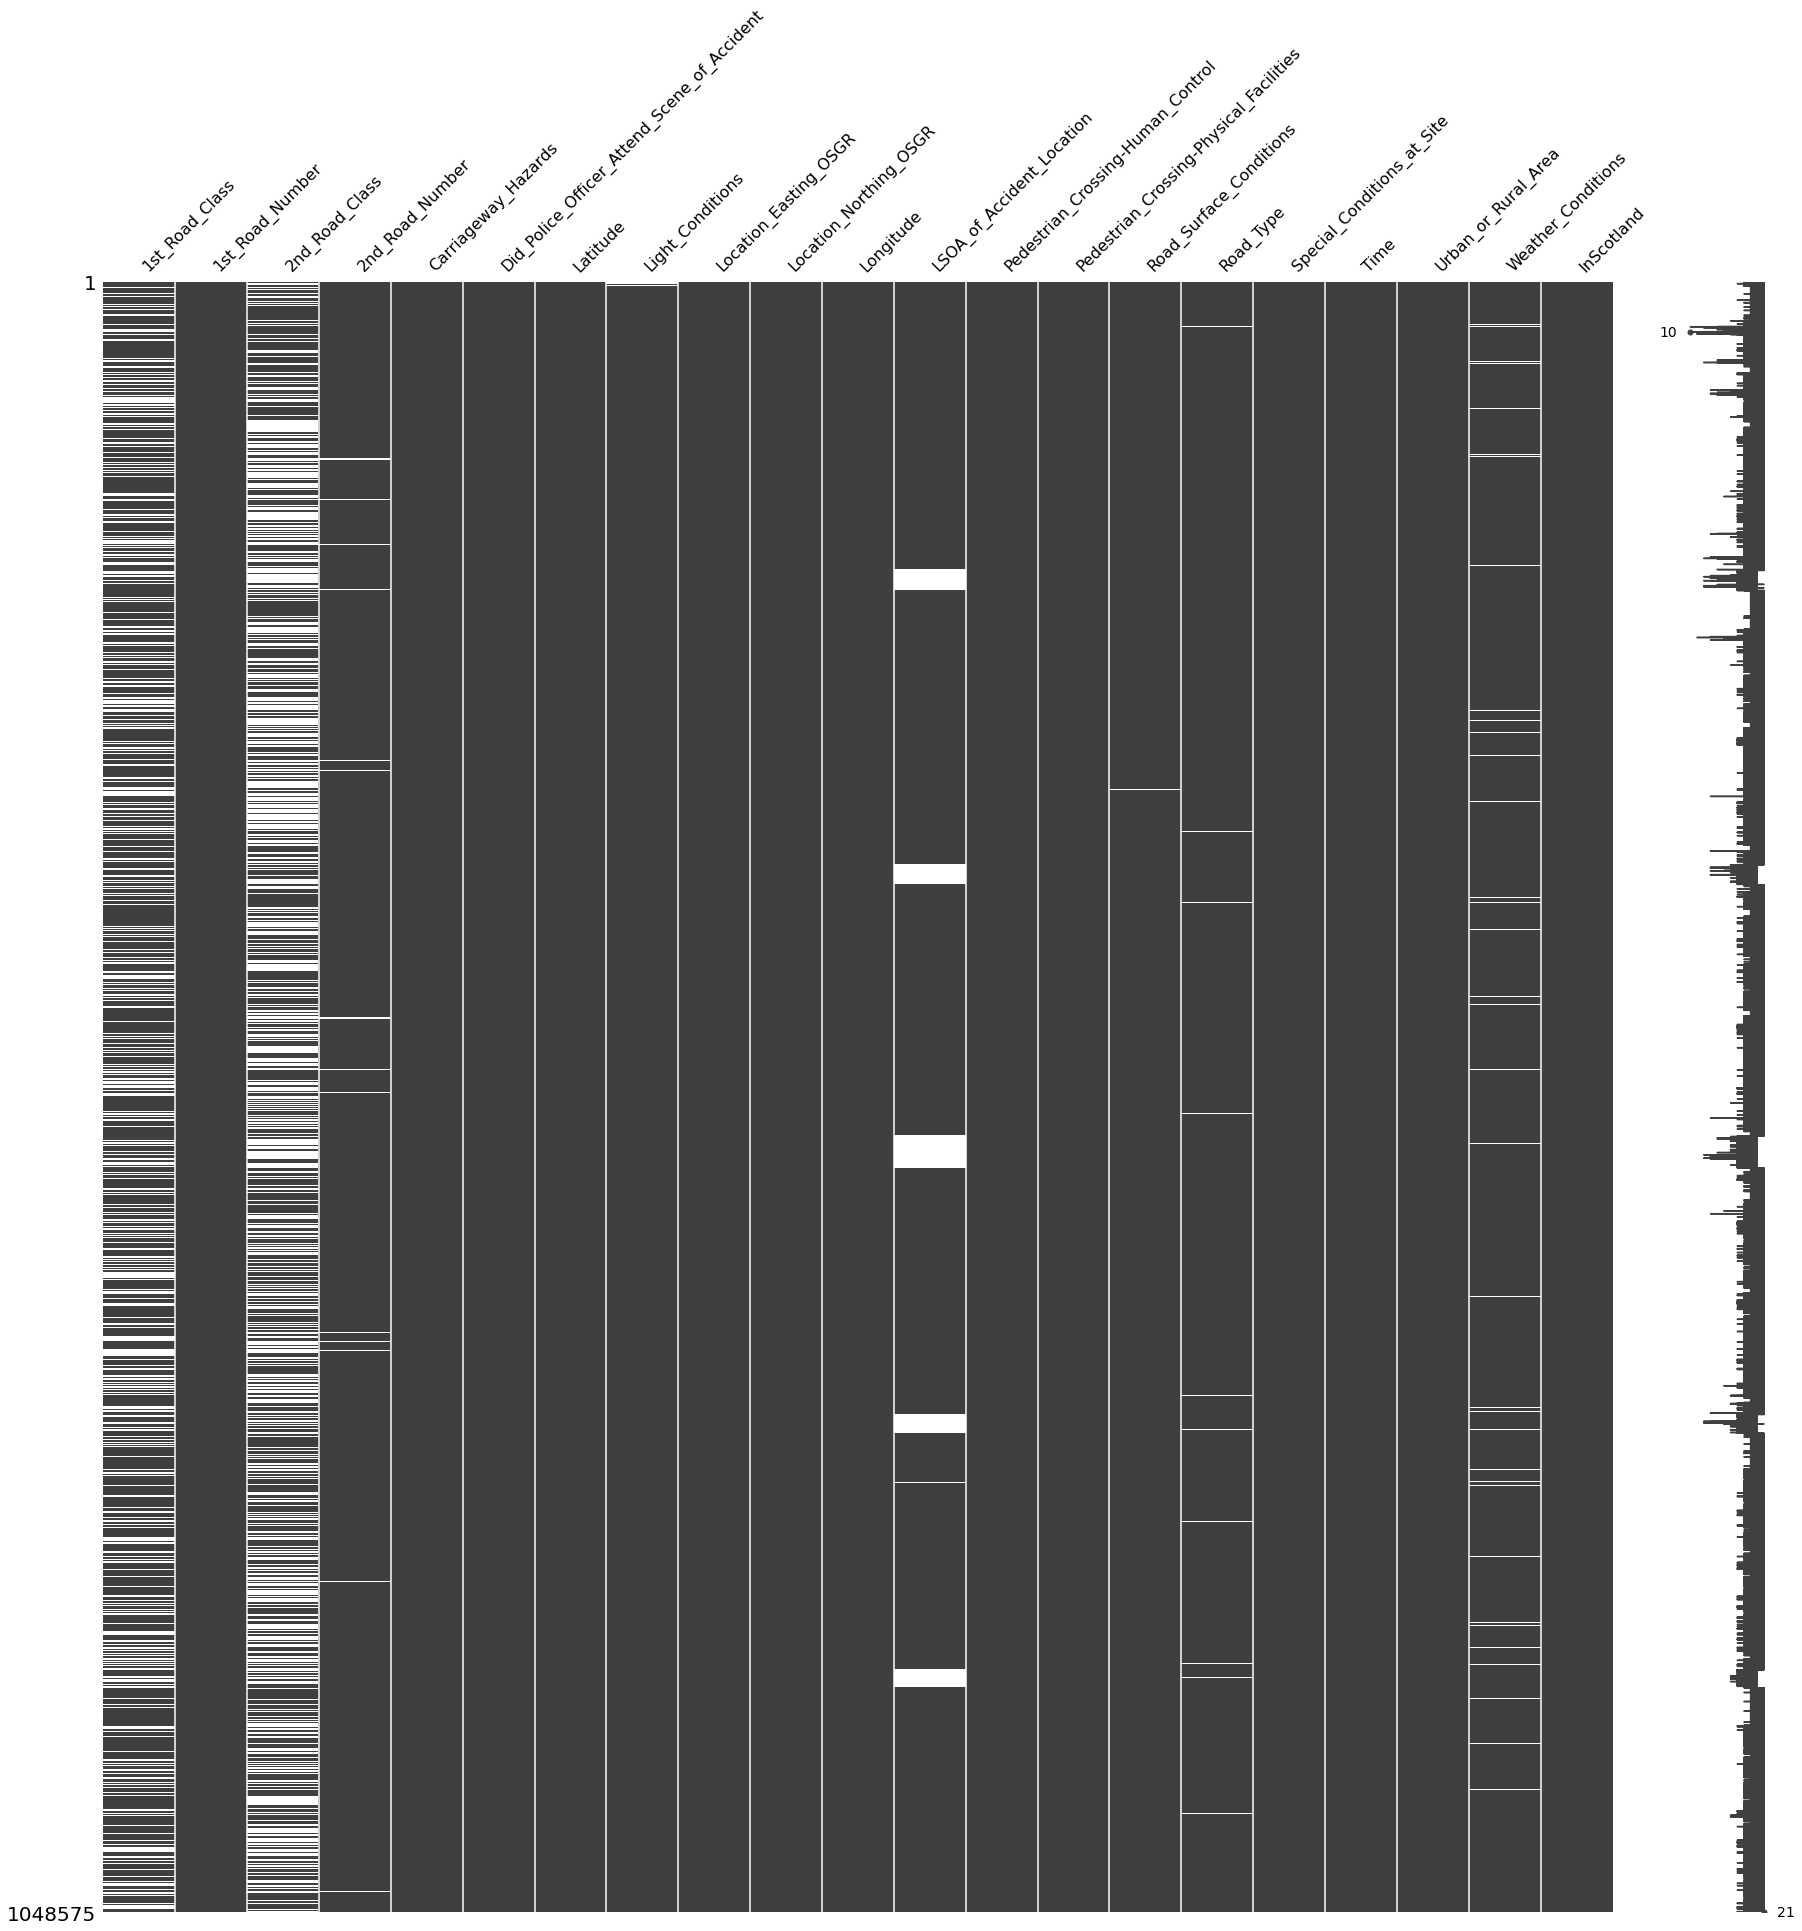

In [7]:
# where exactly are the values missing?
mno.matrix(accidentdf[null_cols], figsize=(30,30))

In [8]:
# shape of the data 
print("No of rows in the acident data is",accidentdf.shape[0])
print("No of columns in the accident data is", accidentdf.shape[1])

No of rows in the acident data is 1048575
No of columns in the accident data is 34


In [9]:
accidentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1048575 non-null  object        
 1   1st_Road_Class                               742986 non-null   object        
 2   1st_Road_Number                              1048573 non-null  float64       
 3   2nd_Road_Class                               608751 non-null   object        
 4   2nd_Road_Number                              1037772 non-null  float64       
 5   Accident_Severity                            1048575 non-null  object        
 6   Carriageway_Hazards                          1048546 non-null  object        
 7   Date                                         1048575 non-null  datetime64[ns]
 8   Day_of_Week                                  1048575

In [10]:
accidentdf.describe().T.style

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.000000,1011.997007,1832.041637,0.000000,0.000000,125.000000,706.000000,9999.000000
2nd_Road_Number,1037772.000000,387.000433,1316.672921,0.000000,0.000000,0.000000,0.000000,9999.000000
Did_Police_Officer_Attend_Scene_of_Accident,1048306.000000,1.198669,0.406263,1.000000,1.000000,1.000000,1.000000,3.000000
Latitude,1048464.000000,52.572970,1.424463,49.914430,51.492443,52.343142,53.464070,60.757544
Location_Easting_OSGR,1048464.000000,438307.694984,94792.918660,64950.000000,375220.000000,437700.000000,521160.000000,655540.000000
Location_Northing_OSGR,1048464.000000,298312.981282,158175.671919,10520.000000,178470.000000,272930.000000,396550.000000,1208800.000000
Longitude,1048463.000000,-1.454537,1.391890,-7.516225,-2.371331,-1.435624,-0.244605,1.762010
Number_of_Casualties,1048575.000000,1.359930,0.822365,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,1048575.000000,1.835030,0.718145,1.000000,1.000000,2.000000,2.000000,32.000000
Pedestrian_Crossing-Human_Control,1048554.000000,0.009292,0.126723,0.000000,0.000000,0.000000,0.000000,2.000000


In [11]:
# find duplicate entries

print("Duplicate entries:", accidentdf.duplicated().sum())
accidentdf = accidentdf.drop_duplicates(keep=False)
print("Duplicate entries:", accidentdf.duplicated().sum())

Duplicate entries: 6
Duplicate entries: 0


In [12]:
# how many unique values to know what to datatypes to change
# to see all the columns
pd.set_option('Display.max_rows', None)
# nunique counts the unique values in every column and dropna=true means we ignore nan values and .sort sorts the values in ascending order
print(accidentdf.nunique(dropna=True).sort_values())


InScotland                                          2
Accident_Severity                                   3
Did_Police_Officer_Attend_Scene_of_Accident         3
Pedestrian_Crossing-Human_Control                   3
Urban_or_Rural_Area                                 3
1st_Road_Class                                      5
Road_Type                                           5
Road_Surface_Conditions                             5
Light_Conditions                                    5
2nd_Road_Class                                      6
Carriageway_Hazards                                 6
Pedestrian_Crossing-Physical_Facilities             6
Year                                                6
Day_of_Week                                         7
Junction_Control                                    7
Speed_limit                                         8
Weather_Conditions                                  8
Special_Conditions_at_Site                         10
Junction_Detail             

In [13]:
# create a dataframe with null columns
nullcolumns=accidentdf[null_cols]
nullcolumns.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Light_Conditions,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,A,3218.0,NaN,0.0,None,1.0,51.489096,NaN,525680.0,178240.0,-0.191170,E01002849,0.0,1.0,Wet or damp,Single carriageway,None,17:42,Urban,Raining no high winds,No
1,B,450.0,C,0.0,None,1.0,51.520075,Darkness - lights lit,524170.0,181650.0,-0.211708,E01002909,0.0,5.0,Dry,Dual carriageway,None,17:36,Urban,Fine no high winds,No
2,C,0.0,NaN,0.0,None,1.0,51.525301,Darkness - lights lit,524520.0,182240.0,-0.206458,E01002857,0.0,0.0,Dry,Single carriageway,None,00:15,Urban,Fine no high winds,No
3,A,3220.0,NaN,0.0,None,1.0,51.482442,NaN,526900.0,177530.0,-0.173862,E01002840,0.0,0.0,Dry,Single carriageway,None,10:35,Urban,Fine no high winds,No
4,NaN,0.0,NaN,0.0,None,1.0,51.495752,Darkness - lighting unknown,528060.0,179040.0,-0.156618,E01002863,0.0,0.0,Wet or damp,Single carriageway,None,21:13,Urban,Fine no high winds,No


In [14]:
# categorical features
categoricalfeatures = accidentdf.select_dtypes(include='object').columns
numericalfeatures = accidentdf.select_dtypes('number').columns
cat=accidentdf[categoricalfeatures].copy()
num=accidentdf[numericalfeatures].copy()
print(cat.sample(9))
print(num.sample(7))

        Accident_Index 1st_Road_Class 2nd_Road_Class Accident_Severity  \
577890   200801KD74175              C              A            Slight   
83421    200520J085802            NaN            NaN            Slight   
240436   200606M044956              A   Unclassified           Serious   
868748     2.00947E+12              A   Unclassified            Slight   
378464     2.00695E+12              A              A            Slight   
257154     2.00613E+12       Motorway              A            Slight   
71922    200514D134305              A   Unclassified            Slight   
1029853  201050CB2E007            NaN            NaN            Slight   
332081     2.00644E+12            NaN   Unclassified            Slight   

        Carriageway_Hazards Day_of_Week                     Junction_Control  \
577890                 None      Monday             Give way or uncontrolled   
83421                  None      Monday         Data missing or out of range   
240436             

# **1. Complete Case Analysis**

In [15]:
# handling missing values
cols = [var for var in accidentdf.columns if accidentdf[var].isnull().mean() < 0.05 and accidentdf[var].isnull().mean()>0]
cols

['1st_Road_Number',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland']

In [16]:
accidentdf[cols].sample(7)

,1st_Road_Number,2nd_Road_Number,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Light_Conditions,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
3464,519.0,0.0,None,1.0,51.568525,Daylight,528940.0,187160.0,-0.140978,0.0,0.0,Wet or damp,Single carriageway,None,16:30,Urban,Raining no high winds,No
510090,7002.0,7002.0,None,1.0,51.406280,Daylight,488220.0,168240.0,-0.733045,0.0,1.0,Wet or damp,Single carriageway,None,08:18,Urban,Snowing no high winds,No
611000,5419.0,2020.0,None,2.0,53.361945,Daylight,351270.0,385260.0,-2.733724,0.0,0.0,Wet or damp,Roundabout,None,15:10,Urban,Raining no high winds,No
603956,6469.0,0.0,None,1.0,53.474064,Daylight,383950.0,397510.0,-2.243286,0.0,0.0,Wet or damp,Single carriageway,None,15:05,Urban,Raining no high winds,No
478814,616.0,0.0,None,1.0,53.222812,Darkness - no lighting,461840.0,369930.0,-1.075219,0.0,0.0,Wet or damp,Single carriageway,None,23:16,Rural,Raining no high winds,No
657704,60.0,0.0,None,3.0,52.986173,Daylight,457660.0,343550.0,-1.142548,0.0,5.0,NaN,Single carriageway,None,16:20,Urban,NaN,No
159353,0.0,0.0,None,1.0,50.338124,Darkness - no lighting,174600.0,53500.0,-5.169013,0.0,0.0,Wet or damp,Single carriageway,None,01:18,Rural,Fine no high winds,No


In [17]:
# see how much you lose when you drop them all
len(accidentdf[cols].dropna())/len(accidentdf)

0.9612288436650921

In [18]:
df = accidentdf[cols].dropna()
accidentdf.shape, df.shape

((1048563, 34), (1007909, 18))

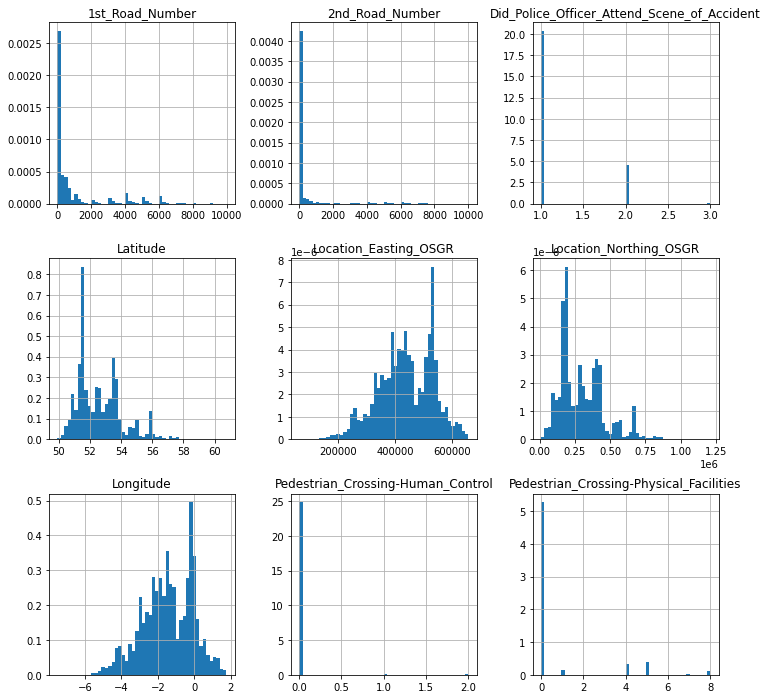

In [19]:
# visualize the distribution 
df.hist(bins=50,density = True, figsize = (12,12))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

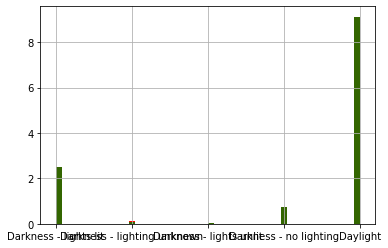

In [20]:
# check for changes in distribution
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
accidentdf['Light_Conditions'].hist(bins=50,ax=ax,density = True, color='red')
# data after cca
df['Light_Conditions'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show

<AxesSubplot:ylabel='Density'>

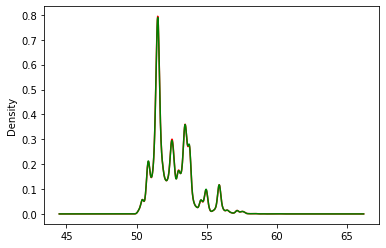

In [21]:
# density plot
fig=plt.figure()
ax = fig.add_subplot(111)
accidentdf['Latitude'].plot.density(color='red')
df['Latitude'].plot.density(color='green')

In [22]:
# percentage change for categorical variables
temp =pd.concat([
    accidentdf['Light_Conditions'].value_counts()/len(accidentdf),
    df['Light_Conditions'].value_counts()/len(df)
],
axis=1)
temp.columns=['original','cca']
temp

,original,cca
Daylight,0.728639,0.729646
Darkness - lights lit,0.198340,0.200812
Darkness - no lighting,0.057979,0.058805
Darkness - lighting unknown,0.008938,0.006621
Darkness - lights unlit,0.004116,0.004116


# **Findings**
**CCA** changes the distribution of:
*  Did_Police_Officer_Attend_Scene_of_Accident',
*  Latitude
*  Light_Conditions
*  Location_Easting_OSGR
*  Location_Northing_OSGR
*  Longitude

# **2. MEAN/MEDIAN IMPUTATION**

In [23]:
accidentdf.isnull().mean()

Accident_Index                                 0.000000
1st_Road_Class                                 0.291432
1st_Road_Number                                0.000002
2nd_Road_Class                                 0.419445
2nd_Road_Number                                0.010303
Accident_Severity                              0.000000
Carriageway_Hazards                            0.000028
Date                                           0.000000
Day_of_Week                                    0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000257
Junction_Control                               0.000000
Junction_Detail                                0.000000
Latitude                                       0.000106
Light_Conditions                               0.001987
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
Location_Easting_OSGR                          0.000106
Location_Northing_OSGR                         0

In [24]:
nullnumcols = [var for var in accidentdf.select_dtypes('number').columns if accidentdf[var].isnull().mean() < 0.05 and accidentdf[var].isnull().mean()>0]
numimpute=accidentdf[nullnumcols].copy()

In [25]:
# mean impuation on where cca did not work
mean_median_copy = numimpute.copy()
X = mean_median_copy
y = accidentdf['Accident_Severity']

In [26]:
XTrain,XTest,YTrain,YTest = train_test_split(X,y,test_size=0.2,random_state=22)

In [27]:
XTrain.shape

(838850, 9)

In [28]:
XTrain.isnull().mean()

1st_Road_Number                                0.000002
2nd_Road_Number                                0.010362
Did_Police_Officer_Attend_Scene_of_Accident    0.000267
Latitude                                       0.000103
Location_Easting_OSGR                          0.000103
Location_Northing_OSGR                         0.000103
Longitude                                      0.000104
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000036
dtype: float64

In [29]:
mean_1st = XTrain['1st_Road_Number'].mean()
median_1st = XTrain['1st_Road_Number'].median()

mean_2nd = XTrain['2nd_Road_Number'].mean()
median_2nd = XTrain['2nd_Road_Number'].median()

mean_Did_Police = XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].mean()
median_Did_Police = XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].median()

mean_Latitude = XTrain['Latitude'].mean()
median_Latitude = XTrain['Latitude'].median()

mean_Easting = XTrain['Location_Easting_OSGR'].mean()
median_Easting = XTrain['Location_Easting_OSGR'].median()

mean_Northing = XTrain['Location_Northing_OSGR'].mean()
median_Northing = XTrain['Location_Northing_OSGR'].median()

mean_Longitude = XTrain['Longitude'].mean()
median_Longitude = XTrain['Longitude'].median()

mean_Human = XTrain['Pedestrian_Crossing-Human_Control'].mean()
median_Human = XTrain['Pedestrian_Crossing-Human_Control'].median()

mean_Physical = XTrain['Pedestrian_Crossing-Physical_Facilities'].mean()
median_Physical = XTrain['Pedestrian_Crossing-Physical_Facilities'].median()



In [30]:
XTrain['1st_mean']=XTrain['1st_Road_Number'].fillna(mean_1st)
XTrain['1st_median']=XTrain['1st_Road_Number'].fillna(median_1st)

XTrain['mean_2']=XTrain['2nd_Road_Number'].fillna(mean_2nd)
XTrain['median_2']=XTrain['2nd_Road_Number'].fillna(median_2nd)

XTrain['mean_Did_Police_Attend']=XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(mean_Did_Police)
XTrain['median_Did_Police_Attend']=XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(median_Did_Police)

XTrain['mean_Latitude'] = XTrain['Latitude'].fillna(mean_Latitude)
XTrain['median_Latitude'] = XTrain['Latitude'].fillna(median_Latitude)

XTrain['mean_Easting'] = XTrain['Location_Easting_OSGR'].fillna(mean_Easting)
XTrain['median_Easting'] = XTrain['Location_Easting_OSGR'].fillna(median_Easting)

XTrain['mean_Northing'] = XTrain['Location_Northing_OSGR'].fillna(mean_Northing)
XTrain['median_Northing'] = XTrain['Location_Northing_OSGR'].fillna(median_Northing)

XTrain['mean_Longitude'] = XTrain['Longitude'].fillna(mean_Longitude)
XTrain['median_Longitude'] = XTrain['Longitude'].fillna(median_Longitude)

XTrain['mean_Human'] = XTrain['Pedestrian_Crossing-Human_Control'].fillna(mean_Human)
XTrain['median_Human'] = XTrain['Pedestrian_Crossing-Human_Control'].fillna(median_Human)

XTrain['mean_Physical'] = XTrain['Pedestrian_Crossing-Physical_Facilities'].fillna(mean_Physical)
XTrain['median_Physical'] = XTrain['Pedestrian_Crossing-Physical_Facilities'].fillna(median_Physical)


In [31]:
# how will the data look like if it got replaced by the mean?
XTrain.sample(10)

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,1st_mean,1st_median,mean_2,median_2,mean_Did_Police_Attend,median_Did_Police_Attend,mean_Latitude,median_Latitude,mean_Easting,median_Easting,mean_Northing,median_Northing,mean_Longitude,median_Longitude,mean_Human,median_Human,mean_Physical,median_Physical
793087,0.0,0.0,2.0,53.789756,415490.0,432630.0,-1.766359,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,53.789756,53.789756,415490.0,415490.0,432630.0,432630.0,-1.766359,-1.766359,0.0,0.0,0.0,0.0
429811,523.0,0.0,1.0,53.199359,391220.0,366930.0,-2.132898,0.0,0.0,523.0,523.0,0.0,0.0,1.0,1.0,53.199359,53.199359,391220.0,391220.0,366930.0,366930.0,-2.132898,-2.132898,0.0,0.0,0.0,0.0
925331,466.0,0.0,1.0,51.571368,508600.0,187000.0,-0.434377,0.0,0.0,466.0,466.0,0.0,0.0,1.0,1.0,51.571368,51.571368,508600.0,508600.0,187000.0,187000.0,-0.434377,-0.434377,0.0,0.0,0.0,0.0
415097,0.0,0.0,1.0,53.677949,356260.0,420370.0,-2.663660,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,53.677949,53.677949,356260.0,356260.0,420370.0,420370.0,-2.663660,-2.663660,0.0,0.0,0.0,0.0
649532,0.0,0.0,1.0,52.869756,347650.0,330540.0,-2.779172,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,52.869756,52.869756,347650.0,347650.0,330540.0,330540.0,-2.779172,-2.779172,0.0,0.0,0.0,0.0
570114,3217.0,0.0,1.0,51.482519,526560.0,177530.0,-0.178756,0.0,8.0,3217.0,3217.0,0.0,0.0,1.0,1.0,51.482519,51.482519,526560.0,526560.0,177530.0,177530.0,-0.178756,-0.178756,0.0,0.0,8.0,8.0
704636,0.0,0.0,2.0,50.821215,532930.0,104110.0,-0.114169,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,50.821215,50.821215,532930.0,532930.0,104110.0,104110.0,-0.114169,-0.114169,0.0,0.0,0.0,0.0
137697,0.0,0.0,1.0,50.849608,465200.0,105980.0,-1.075202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,50.849608,50.849608,465200.0,465200.0,105980.0,105980.0,-1.075202,-1.075202,0.0,0.0,0.0,0.0
620870,1224.0,0.0,1.0,53.952188,449580.0,450940.0,-1.245981,0.0,0.0,1224.0,1224.0,0.0,0.0,1.0,1.0,53.952188,53.952188,449580.0,449580.0,450940.0,450940.0,-1.245981,-1.245981,0.0,0.0,0.0,0.0
797487,25.0,0.0,1.0,53.565624,461620.0,408070.0,-1.071079,0.0,0.0,25.0,25.0,0.0,0.0,1.0,1.0,53.565624,53.565624,461620.0,461620.0,408070.0,408070.0,-1.071079,-1.071079,0.0,0.0,0.0,0.0


In [32]:
print("Variance of 1st Road Number is:", XTrain['1st_Road_Number'].var())
print("Variance of the mean of 1st Road Number is:", XTrain['1st_mean'].var())
print("Variance of median of 1st Road Number is:", XTrain['1st_median'].var())

print("Variance of 2nd Road Number is:", XTrain['2nd_Road_Number'].var())
print("Variance of the mean of 2nd Road Number is:", XTrain['mean_2'].var())
print("Variance of median of 2nd Road Number is:", XTrain['median_2'].var())

print("Variance of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].var())
print("Variance of the mean of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['mean_Did_Police_Attend'].var())
print("Variance of median of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['median_Did_Police_Attend'].var())

print("Variance of Latitude is:", XTrain['Latitude'].var())
print("Variance of the mean of Latitude is:", XTrain['mean_Latitude'].var())
print("Variance of median of Latitude is:", XTrain['median_Latitude'].var())

print("Variance of Location_Easting_OSGR is:", XTrain['Location_Easting_OSGR'].var())
print("Variance of the mean of Location_Easting_OSGR is:", XTrain['mean_Easting'].var())
print("Variance of median of Location_Easting_OSGR is:", XTrain['median_Easting'].var())

print("Variance of Location_Northing_OSGR is:", XTrain['Location_Northing_OSGR'].var())
print("Variance of the mean of Location_Northing_OSGR is:", XTrain['mean_Northing'].var())
print("Variance of median of Location_Northing_OSGR is:", XTrain['median_Northing'].var())

print("Variance of Longitude is:", XTrain['Longitude'].var())
print("Variance of the mean of Longitude is:", XTrain['mean_Longitude'].var())
print("Variance of median of Longitude is:", XTrain['median_Longitude'].var())

print("Variance of Pedestrian_Crossing-Human_Control is:", XTrain['Pedestrian_Crossing-Human_Control'].var())
print("Variance of the mean of Pedestrian_Crossing-Human_Control is:", XTrain['mean_Human'].var())
print("Variance of median of Pedestrian_Crossing-Human_Control is:", XTrain['median_Human'].var())

print("Variance of Pedestrian_Crossing-Physical_Facilities is:", XTrain['Pedestrian_Crossing-Physical_Facilities'].var())
print("Variance of the mean of Pedestrian_Crossing-Physical_Facilities is:", XTrain['mean_Physical'].var())
print("Variance of median of Pedestrian_Crossing-Physical_Facilities is:", XTrain['median_Physical'].var())

Variance of 1st Road Number is: 3355680.4181562923
Variance of the mean of 1st Road Number is: 3355672.417478177
Variance of median of 1st Road Number is: 3355674.2907535057
Variance of 2nd Road Number is: 1737060.3830868471
Variance of the mean of 2nd Road Number is: 1719061.2809244904
Variance of median of 2nd Road Number is: 1720600.7519409065
Variance of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16482459275189498
Variance of the mean of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16478057921814046
Variance of median of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16479108479395374
Variance of Latitude is: 2.0278601351628884
Variance of the mean of Latitude is: 2.0276522360396565
Variance of median of Latitude is: 2.027657597034787
Variance of Location_Easting_OSGR is: 8984575866.148138
Variance of the mean of Location_Easting_OSGR is: 8983654754.572048
Variance of median of Location_Easting_OSGR is: 8983654794.045706
Variance of Location_Northing_OSGR is: 2500424

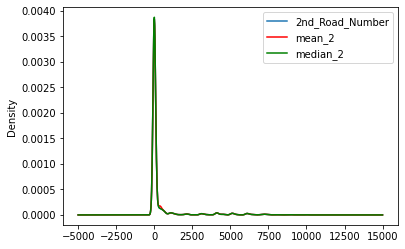

In [33]:
# to check if the distribution changed
fig = plt.figure()
ax = fig.add_subplot(111)
XTrain["2nd_Road_Number"].plot(kind='kde',ax=ax)
XTrain['mean_2'].plot(kind='kde',ax=ax,color = 'red')
XTrain['median_2'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [34]:
# ideally we would want the variance the variance not disturbed
# more change , change in covariance with other variables
XTrain.cov()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,1st_mean,1st_median,mean_2,median_2,mean_Did_Police_Attend,median_Did_Police_Attend,mean_Latitude,median_Latitude,mean_Easting,median_Easting,mean_Northing,median_Northing,mean_Longitude,median_Longitude,mean_Human,median_Human,mean_Physical,median_Physical
1st_Road_Number,3.355680e+06,4.454060e+05,3.938519,113.194221,-1.374229e+07,1.231556e+07,-196.874766,0.446932,123.482480,3.355680e+06,3.355680e+06,4.407907e+05,4.397021e+05,3.937467,3.955705,113.182616,113.182957,-1.374088e+07,-1.374088e+07,1.231430e+07,1.231434e+07,-196.854347,-196.854398,0.446923,0.446946,123.478064,123.488156
2nd_Road_Number,4.454060e+05,1.737060e+06,15.220094,8.502192,1.530611e+06,8.301277e+05,24.626907,0.543150,214.213069,4.454049e+05,4.454057e+05,1.737060e+06,1.737060e+06,15.216186,15.225943,8.501358,8.506963,1.530449e+06,1.530464e+06,8.300466e+05,8.306659e+05,24.624280,24.623814,0.543142,0.543136,214.206352,214.204585
Did_Police_Officer_Attend_Scene_of_Accident,3.938519e+00,1.522009e+01,0.164825,-0.006746,1.094239e+02,-7.624622e+02,0.001908,0.000515,0.005598,3.938509e+00,3.937872e+00,1.506254e+01,1.504225e+01,0.164825,0.164825,-0.006745,-0.006747,1.094127e+02,1.094061e+02,-7.623837e+02,-7.626531e+02,0.001908,0.001908,0.000515,0.000515,0.005597,0.005597
Latitude,1.131942e+02,8.502192e+00,-0.006746,2.027860,-5.322398e+04,2.251717e+05,-0.802298,0.007800,0.007275,1.131940e+02,1.131826e+02,8.414131e+00,8.828581e+00,-0.006744,-0.006781,2.027860,2.027860,-5.322398e+04,-5.322398e+04,2.251717e+05,2.251717e+05,-0.802297,-0.802297,0.007799,0.007799,0.007274,0.007250
Location_Easting_OSGR,-1.374229e+07,1.530611e+06,109.423881,-53223.976731,8.984576e+09,-5.880070e+09,131840.685128,-307.040077,8298.731758,-1.374226e+07,-1.374190e+07,1.514746e+06,1.405771e+06,109.394689,108.809490,-53223.976731,-53223.976731,8.984576e+09,8.984576e+09,-5.880070e+09,-5.880070e+09,131840.527943,131840.528655,-307.033860,-307.022017,8298.444866,8299.858619
Location_Northing_OSGR,1.231556e+07,8.301277e+05,-762.462158,225171.688676,-5.880070e+09,2.500425e+10,-88669.386103,867.238185,780.274386,1.231553e+07,1.231426e+07,8.215300e+05,8.660256e+05,-762.258312,-766.406600,225171.688676,225171.688676,-5.880070e+09,-5.880070e+09,2.500425e+10,2.500425e+10,-88669.280389,-88669.284431,867.220621,867.196360,780.247343,777.556030
Longitude,-1.968748e+02,2.462691e+01,0.001908,-0.802298,1.318407e+05,-8.866939e+04,1.937083,-0.004733,0.118820,-1.968743e+02,-1.968685e+02,2.437166e+01,2.276189e+01,0.001908,0.001897,-0.802298,-0.802298,1.318407e+05,1.318407e+05,-8.866939e+04,-8.866939e+04,1.937083,1.937083,-0.004732,-0.004732,0.118816,0.118837
Pedestrian_Crossing-Human_Control,4.469324e-01,5.431502e-01,0.000515,0.007800,-3.070401e+02,8.672382e+02,-0.004733,0.016107,0.022404,4.469313e-01,4.469510e-01,5.375253e-01,5.352181e-01,0.000515,0.000515,0.007799,0.007798,-3.070086e+02,-3.070117e+02,8.671493e+02,8.670228e+02,-0.004732,-0.004732,0.016107,0.016107,0.022403,0.022402
Pedestrian_Crossing-Physical_Facilities,1.234825e+02,2.142131e+02,0.005598,0.007275,8.298732e+03,7.802744e+02,0.118820,0.022404,3.064647,1.234822e+02,1.234836e+02,2.119944e+02,2.131964e+02,0.005596,0.005620,0.007274,0.007278,8.297891e+03,8.297901e+03,7.801953e+02,7.806112e+02,0.118808,0.118808,0.022403,0.022403,3.064647,3.064647
1st_mean,3.355680e+06,4.454049e+05,3.938509,113.193951,-1.374226e+07,1.231553e+07,-196.874296,0.446931,123.482185,3.355672e+06,3.355672e+06,4.407897e+05,4.397011e+05,3.937457,3.955696,113.182347,113.182687,-1.374085e+07,-1.374085e+07,1.231427e+07,1.231431e+07,-196.853878,-196.853928,0.446922,0.446945,123.477769,123.487862


In [35]:
XTrain.corr()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,1st_mean,1st_median,mean_2,median_2,mean_Did_Police_Attend,median_Did_Police_Attend,mean_Latitude,median_Latitude,mean_Easting,median_Easting,mean_Northing,median_Northing,mean_Longitude,median_Longitude,mean_Human,median_Human,mean_Physical,median_Physical
1st_Road_Number,1.000000,0.184746,0.005296,0.043393,-0.079145,0.042517,-0.077220,0.001922,0.038505,1.000000,1.000000,0.183525,0.182990,0.005295,0.005319,0.043391,0.043391,-0.079141,-0.079141,0.042515,0.042515,-0.077216,-0.077216,0.001922,0.001922,0.038505,0.038508
2nd_Road_Number,0.184746,1.000000,0.028445,0.004528,0.012264,0.003981,0.013441,0.003248,0.092677,0.184746,0.184746,1.000000,1.000000,0.028443,0.028460,0.004528,0.004531,0.012264,0.012264,0.003981,0.003984,0.013440,0.013440,0.003248,0.003248,0.092676,0.092675
Did_Police_Officer_Attend_Scene_of_Accident,0.005296,0.028445,1.000000,-0.011668,0.002843,-0.011877,0.003378,0.009992,0.007875,0.005296,0.005295,0.028295,0.028244,1.000000,1.000000,-0.011667,-0.011671,0.002843,0.002843,-0.011876,-0.011880,0.003377,0.003378,0.009992,0.009991,0.007875,0.007874
Latitude,0.043393,0.004528,-0.011668,1.000000,-0.394312,0.999972,-0.404802,0.043168,0.002918,0.043393,0.043388,0.004506,0.004726,-0.011667,-0.011731,1.000000,1.000000,-0.394312,-0.394312,0.999972,0.999972,-0.404802,-0.404802,0.043168,0.043166,0.002918,0.002908
Location_Easting_OSGR,-0.079145,0.012264,0.002843,-0.394312,1.000000,-0.392308,0.999370,-0.025530,0.050012,-0.079145,-0.079143,0.012188,0.011306,0.002843,0.002828,-0.394312,-0.394312,1.000000,1.000000,-0.392308,-0.392308,0.999370,0.999370,-0.025530,-0.025529,0.050011,0.050019
Location_Northing_OSGR,0.042517,0.003981,-0.011877,0.999972,-0.392308,1.000000,-0.402896,0.043226,0.002819,0.042517,0.042512,0.003962,0.004175,-0.011876,-0.011940,0.999972,0.999972,-0.392308,-0.392308,1.000000,1.000000,-0.402896,-0.402896,0.043226,0.043224,0.002819,0.002809
Longitude,-0.077220,0.013441,0.003378,-0.404802,0.999370,-0.402896,1.000000,-0.026800,0.048767,-0.077220,-0.077217,0.013355,0.012468,0.003377,0.003358,-0.404802,-0.404802,0.999370,0.999370,-0.402896,-0.402896,1.000000,1.000000,-0.026800,-0.026799,0.048766,0.048775
Pedestrian_Crossing-Human_Control,0.001922,0.003248,0.009992,0.043168,-0.025530,0.043226,-0.026800,1.000000,0.100840,0.001922,0.001922,0.003230,0.003215,0.009991,0.009991,0.043154,0.043147,-0.025522,-0.025522,0.043212,0.043205,-0.026791,-0.026790,1.000000,1.000000,0.100836,0.100833
Pedestrian_Crossing-Physical_Facilities,0.038505,0.092677,0.007875,0.002918,0.050012,0.002819,0.048767,0.100840,1.000000,0.038505,0.038506,0.092361,0.092843,0.007875,0.007909,0.002918,0.002919,0.050009,0.050009,0.002819,0.002820,0.048765,0.048764,0.100839,0.100838,1.000000,1.000000
1st_mean,1.000000,0.184746,0.005296,0.043393,-0.079145,0.042517,-0.077220,0.001922,0.038505,1.000000,1.000000,0.183525,0.182990,0.005295,0.005319,0.043390,0.043390,-0.079140,-0.079140,0.042514,0.042514,-0.077215,-0.077215,0.001922,0.001922,0.038505,0.038508


# FINDINGS
* Mean/Median imputation can work on all numerical variables except 1st Road Number.
* The distribution is symmetric; mean =median.
* Data is less/not skewed.
* Mean imputation changes the behaviour of:
    *  Pedestrian_Crossing-Human_Control
    *  Did_Police_Officer_Attend_Scene_of_Accident
    *  Pedestrian_Crossing-Physical_Facilities     

<AxesSubplot:>

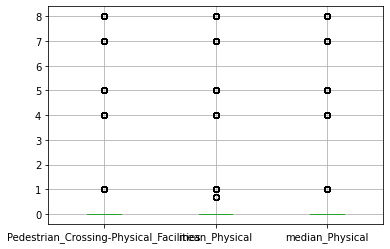

In [36]:
# box plot to check for outliers
XTrain[['Pedestrian_Crossing-Physical_Facilities','mean_Physical', 'median_Physical']].boxplot()


In [37]:
XTrain.isnull().mean()

1st_Road_Number                                0.000002
2nd_Road_Number                                0.010362
Did_Police_Officer_Attend_Scene_of_Accident    0.000267
Latitude                                       0.000103
Location_Easting_OSGR                          0.000103
Location_Northing_OSGR                         0.000103
Longitude                                      0.000104
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000036
1st_mean                                       0.000000
1st_median                                     0.000000
mean_2                                         0.000000
median_2                                       0.000000
mean_Did_Police_Attend                         0.000000
median_Did_Police_Attend                       0.000000
mean_Latitude                                  0.000000
median_Latitude                                0.000000
mean_Easting                                   0

# **3. ARBITRARY VALUE IMPUTATION**

In [38]:
arbitrary_copy = mean_median_copy.copy()
X = arbitrary_copy
y = accidentdf['Accident_Severity']

In [39]:
XTrain,XTest,YTrain,YTest = train_test_split(X,y,test_size=0.2,random_state=22)

In [40]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((838850, 9), (209713, 9), (838850,), (209713,))

In [41]:
XTrain.isnull().mean()

1st_Road_Number                                0.000002
2nd_Road_Number                                0.010362
Did_Police_Officer_Attend_Scene_of_Accident    0.000267
Latitude                                       0.000103
Location_Easting_OSGR                          0.000103
Location_Northing_OSGR                         0.000103
Longitude                                      0.000104
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000036
dtype: float64

In [42]:
XTrain.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities
count,838848.000000,830158.000000,838626.000000,838764.000000,838764.000000,8.387640e+05,838763.000000,838833.000000,838820.000000
mean,1011.396887,387.462406,1.198374,52.572681,438370.538345,2.982811e+05,-1.453595,0.009325,0.680064
std,1831.851637,1317.975866,0.405986,1.424030,94787.002622,1.581273e+05,1.391791,0.126913,1.750613
min,0.000000,0.000000,1.000000,49.914430,65860.000000,1.052000e+04,-7.498973,0.000000,0.000000
25%,0.000000,0.000000,1.000000,51.492541,375250.000000,1.784800e+05,-2.370208,0.000000,0.000000
50%,125.000000,0.000000,1.000000,52.343996,437750.000000,2.730100e+05,-1.434928,0.000000,0.000000
75%,706.000000,0.000000,1.000000,53.463033,521190.000000,3.964700e+05,-0.243959,0.000000,0.000000
max,9999.000000,9999.000000,3.000000,60.757544,655370.000000,1.208800e+06,1.759398,2.000000,8.000000


In [43]:
# filling in with arbitrary values
# pick any random number greater than max value, and less than min value
# which one works better
XTrain['1st_max']=XTrain['1st_Road_Number'].fillna(50000)
XTrain['1st_min']=XTrain['1st_Road_Number'].fillna(-100)

XTrain['2nd_max']=XTrain['2nd_Road_Number'].fillna(23468)
XTrain['2nd_min']=XTrain['2nd_Road_Number'].fillna(-1)

XTrain['Did_Police_Attend_max']=XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(4)
XTrain['Did_Police_Attend_min']=XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(0)

XTrain['Latitude_max'] = XTrain['Latitude'].fillna(700)
XTrain['Latitude_min'] = XTrain['Latitude'].fillna(12)

XTrain['Easting_max'] = XTrain['Location_Easting_OSGR'].fillna(1000000)
XTrain['Easting_min'] = XTrain['Location_Easting_OSGR'].fillna(10000)

XTrain['Northing_max'] = XTrain['Location_Northing_OSGR'].fillna(2.6)
XTrain['Northing_min'] = XTrain['Location_Northing_OSGR'].fillna(0.2)

XTrain['Longitude_max'] = XTrain['Longitude'].fillna(20)
XTrain['Longitude_min'] = XTrain['Longitude'].fillna(-50)

XTrain['Human_max'] = XTrain['Pedestrian_Crossing-Human_Control'].fillna(10)
XTrain['Human_min'] = XTrain['Pedestrian_Crossing-Human_Control'].fillna(-1)

XTrain['Physical_max'] = XTrain['Pedestrian_Crossing-Physical_Facilities'].fillna(10)
XTrain['Physical_min'] = XTrain['Pedestrian_Crossing-Physical_Facilities'].fillna(-1)


In [44]:
XTrain.sample(5)

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,1st_max,1st_min,2nd_max,2nd_min,Did_Police_Attend_max,Did_Police_Attend_min,Latitude_max,Latitude_min,Easting_max,Easting_min,Northing_max,Northing_min,Longitude_max,Longitude_min,Human_max,Human_min,Physical_max,Physical_min
339633,20.0,0.0,1.0,51.239307,589840.0,152420.0,0.718253,0.0,0.0,20.0,20.0,0.0,0.0,1.0,1.0,51.239307,51.239307,589840.0,589840.0,152420.0,152420.0,0.718253,0.718253,0.0,0.0,0.0,0.0
111835,1309.0,1301.0,2.0,52.171318,544570.0,254670.0,0.112631,0.0,5.0,1309.0,1309.0,1301.0,1301.0,2.0,2.0,52.171318,52.171318,544570.0,544570.0,254670.0,254670.0,0.112631,0.112631,0.0,0.0,5.0,5.0
729026,82.0,0.0,1.0,56.837286,212660.0,775960.0,-5.072672,0.0,0.0,82.0,82.0,0.0,0.0,1.0,1.0,56.837286,56.837286,212660.0,212660.0,775960.0,775960.0,-5.072672,-5.072672,0.0,0.0,0.0,0.0
257221,0.0,0.0,2.0,53.795671,416070.0,433290.0,-1.757521,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,53.795671,53.795671,416070.0,416070.0,433290.0,433290.0,-1.757521,-1.757521,0.0,0.0,0.0,0.0
383529,0.0,0.0,1.0,55.771625,253840.0,655600.0,-4.331570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,55.771625,55.771625,253840.0,253840.0,655600.0,655600.0,-4.331570,-4.331570,0.0,0.0,0.0,0.0


In [45]:
print("Variance of 1st Road Number is:", XTrain['1st_Road_Number'].var())
print("Variance of the max of 1st Road Number is:", XTrain['1st_max'].var())
print("Variance of min of 1st Road Number is:", XTrain['1st_min'].var())

print("Variance of 2nd Road Number is:", XTrain['2nd_Road_Number'].var())
print("Variance of the max of 2nd Road Number is:", XTrain['2nd_max'].var())
print("Variance of min of 2nd Road Number is:", XTrain['2nd_min'].var())

print("Variance of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['Did_Police_Officer_Attend_Scene_of_Accident'].var())
print("Variance of the max of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['Did_Police_Attend_max'].var())
print("Variance of min of Did_Police_Officer_Attend_Scene_of_Accident is:", XTrain['Did_Police_Attend_max'].var())

print("Variance of Latitude is:", XTrain['Latitude'].var())
print("Variance of the max of Latitude is:", XTrain['Latitude_max'].var())
print("Variance of min of Latitude is:", XTrain['Latitude_min'].var())

print("Variance of Location_Easting_OSGR is:", XTrain['Location_Easting_OSGR'].var())
print("Variance of the max of Location_Easting_OSGR is:", XTrain['Easting_max'].var())
print("Variance of min of Location_Easting_OSGR is:", XTrain['Easting_min'].var())

print("Variance of Location_Northing_OSGR is:", XTrain['Location_Northing_OSGR'].var())
print("Variance of the max of Location_Northing_OSGR is:", XTrain['Northing_max'].var())
print("Variance of min of Location_Northing_OSGR is:", XTrain['Northing_min'].var())

print("Variance of Longitude is:", XTrain['Longitude'].var())
print("Variance of the max of Longitude is:", XTrain['Longitude_max'].var())
print("Variance of min of Longitude is:", XTrain['Longitude_min'].var())

print("Variance of Pedestrian_Crossing-Human_Control is:", XTrain['Pedestrian_Crossing-Human_Control'].var())
print("Variance of the max of Pedestrian_Crossing-Human_Control is:", XTrain['Human_max'].var())
print("Variance of min of Pedestrian_Crossing-Human_Control is:", XTrain['Human_min'].var())

print("Variance of Pedestrian_Crossing-Physical_Facilities is:", XTrain['Pedestrian_Crossing-Physical_Facilities'].var())
print("Variance of the max of Pedestrian_Crossing-Physical_Facilities is:", XTrain['Physical_max'].var())
print("Variance of min of Pedestrian_Crossing-Physical_Facilities is:", XTrain['Physical_min'].var())

Variance of 1st Road Number is: 3355680.4181562923
Variance of the max of 1st Road Number is: 3361394.2518324098
Variance of min of 1st Road Number is: 3355675.3624661225
Variance of 2nd Road Number is: 1737060.3830868471
Variance of the max of 2nd Road Number is: 7181721.846800315
Variance of min of 2nd Road Number is: 1720608.7086231536
Variance of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16482459275189498
Variance of the max of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16687598630949418
Variance of min of Did_Police_Officer_Attend_Scene_of_Accident is: 0.16687598630949418
Variance of Latitude is: 2.0278601351628884
Variance of the max of Latitude is: 44.996348379553766
Variance of min of Latitude is: 2.1963998130602738
Variance of Location_Easting_OSGR is: 8984575866.148138
Variance of the max of Location_Easting_OSGR is: 9015989533.556536
Variance of min of Location_Easting_OSGR is: 9002465643.609356
Variance of Location_Northing_OSGR is: 25004247265.733852
Varianc

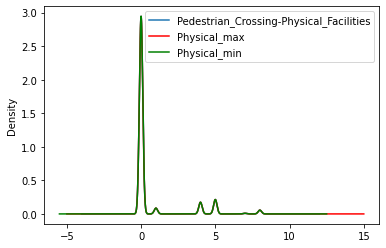

In [46]:
# plot the distribution
# to check if the distribution changed
fig = plt.figure()
ax = fig.add_subplot(111)
XTrain["Pedestrian_Crossing-Physical_Facilities"].plot(kind='kde',ax=ax)
XTrain['Physical_max'].plot(kind='kde',ax=ax,color = 'red')
XTrain['Physical_min'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [47]:
XTrain.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,1st_max,1st_min,2nd_max,2nd_min,Did_Police_Attend_max,Did_Police_Attend_min,Latitude_max,Latitude_min,Easting_max,Easting_min,Northing_max,Northing_min,Longitude_max,Longitude_min,Human_max,Human_min,Physical_max,Physical_min
count,838848.000000,830158.000000,838626.000000,838764.000000,838764.000000,8.387640e+05,838763.000000,838833.000000,838820.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,8.388500e+05,8.388500e+05,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000,838850.000000
mean,1011.396887,387.462406,1.198374,52.572681,438370.538345,2.982811e+05,-1.453595,0.009325,0.680064,1011.513687,1011.394237,626.618432,383.437234,1.199123,1.198054,52.639056,52.568521,438428.117332,438326.621236,2.982506e+05,2.982506e+05,-1.451370,-1.458630,0.009527,0.009304,0.680397,0.680004
std,1831.851637,1317.975866,0.405986,1.424030,94787.002622,1.581273e+05,1.391791,0.126913,1.750613,1833.410552,1831.850257,2679.873476,1311.719752,0.408505,0.406404,6.707932,1.482026,94952.564650,94881.323998,1.581480e+05,1.581480e+05,1.408763,1.476917,0.134646,0.126993,1.751469,1.750611
min,0.000000,0.000000,1.000000,49.914430,65860.000000,1.052000e+04,-7.498973,0.000000,0.000000,0.000000,-100.000000,0.000000,-1.000000,1.000000,0.000000,49.914430,12.000000,65860.000000,10000.000000,2.600000e+00,2.000000e-01,-7.498973,-50.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,1.000000,51.492541,375250.000000,1.784800e+05,-2.370208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,51.492563,51.492492,375260.000000,375230.000000,1.784700e+05,1.784700e+05,-2.369982,-2.370757,0.000000,0.000000,0.000000,0.000000
50%,125.000000,0.000000,1.000000,52.343996,437750.000000,2.730100e+05,-1.434928,0.000000,0.000000,125.000000,125.000000,0.000000,0.000000,1.000000,1.000000,52.344290,52.343686,437760.000000,437740.000000,2.729800e+05,2.729800e+05,-1.434786,-1.435101,0.000000,0.000000,0.000000,0.000000
75%,706.000000,0.000000,1.000000,53.463033,521190.000000,3.964700e+05,-0.243959,0.000000,0.000000,706.000000,706.000000,0.000000,0.000000,1.000000,1.000000,53.463315,53.462953,521210.000000,521190.000000,3.964600e+05,3.964600e+05,-0.243831,-0.244044,0.000000,0.000000,0.000000,0.000000
max,9999.000000,9999.000000,3.000000,60.757544,655370.000000,1.208800e+06,1.759398,2.000000,8.000000,50000.000000,9999.000000,23468.000000,9999.000000,4.000000,3.000000,700.000000,60.757544,1000000.000000,655370.000000,1.208800e+06,1.208800e+06,20.000000,1.759398,10.000000,2.000000,10.000000,8.000000


# **FINDINGS**
Using arbitrary value imputation in either of the columns does not distort the distrubution of our data.

# **4. RANDOM VALUE IMPUTATION**

In [48]:
random_copy = arbitrary_copy.copy()
random_copy.isnull().mean()

1st_Road_Number                                0.000002
2nd_Road_Number                                0.010303
Did_Police_Officer_Attend_Scene_of_Accident    0.000257
Latitude                                       0.000106
Location_Easting_OSGR                          0.000106
Location_Northing_OSGR                         0.000106
Longitude                                      0.000107
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000035
dtype: float64

In [49]:
X = random_copy
y = accidentdf['Accident_Severity']

In [50]:
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.2,random_state = 22)

In [51]:
XTrain.isnull().mean()
# none of the values is >5 % but I will try anyway

1st_Road_Number                                0.000002
2nd_Road_Number                                0.010362
Did_Police_Officer_Attend_Scene_of_Accident    0.000267
Latitude                                       0.000103
Location_Easting_OSGR                          0.000103
Location_Northing_OSGR                         0.000103
Longitude                                      0.000104
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000036
dtype: float64

In [52]:
# create a separate column
XTrain_na = XTrain['2nd_Road_Number'].isnull().sum()

In [53]:
XTrain_na

8692

In [54]:
# pick one column first
random_sample = XTrain['2nd_Road_Number'].dropna().sample((XTrain_na), random_state=22)
# fill in with randomly picked Xtrain_na
# what is the index of all the missing values, then put the missing values in the index
random_sample.index = XTrain[XTrain['2nd_Road_Number'].isnull()].index

In [55]:
# now replace the missing values in the original dataset with the randomly extracted values
XTrain.loc[XTrain['2nd_Road_Number'].isnull(),'2nd_Road_Number']=random_sample


In [56]:
# now, how many values are in 2nd road number?
XTrain['2nd_Road_Number'].isnull().sum()

0

In [57]:
XTrain.isnull().mean()

1st_Road_Number                                0.000002
2nd_Road_Number                                0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000267
Latitude                                       0.000103
Location_Easting_OSGR                          0.000103
Location_Northing_OSGR                         0.000103
Longitude                                      0.000104
Pedestrian_Crossing-Human_Control              0.000020
Pedestrian_Crossing-Physical_Facilities        0.000036
dtype: float64

In [58]:
print("pick from here")

pick from here
